In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import accuracy_score



In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X = df.iloc[:,3:13]
y = df.iloc[:,-1]

In [5]:
#one hot encoding geography and gender


geo = pd.get_dummies(X['Geography'],columns=['Germany','Spain','France'])*1
gen = pd.get_dummies(X['Gender'])*1

In [6]:
X = pd.concat([X,geo,gen],axis=1)
X.drop(columns=['Geography','Gender'],axis=1,inplace=True)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
#scale the data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
initializer_combinations = [ ('he_uniform','he_uniform','glorot_uniform'),
                            ('he_uniform','he_uniform','glorot_normal'),
                            ('he_normal','he_normal','glorot_uniform'),
                            ('he_normal','he_normal','glorot_normal')]

In [10]:
def create_classifier_model(initializer_combination:tuple,X_train,y_train,X_test,y_test):

    l1_init , l2_init, l3_init  = initializer_combination
    
    model = Sequential()

    model.add(Dense(units=6,kernel_initializer= l1_init,activation='relu',input_dim = 13))
    model.add(Dense(units=6,kernel_initializer= l2_init,activation='relu'))
    model.add(Dense(units=1,kernel_initializer=l3_init,activation='sigmoid'))

    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

    model_history = model.fit(X_train,y_train,validation_split=0.33,epochs=100,batch_size=32,verbose=False)

    loss_train = model_history.history['loss']
    loss_val = model_history.history['val_loss']

    acc_train = model_history.history['accuracy']
    acc_val = model_history.history['val_accuracy']


    predictions = model.predict(X_test)
    predictions = (predictions>0.5)*1

    score= round(accuracy_score(predictions,y_test)*100,2)

    return [loss_train,loss_val,acc_train,acc_val] , score






In [11]:
comparison_dict = {}
accuracies = {}

for combination in initializer_combinations:

    results, accuracy = create_classifier_model(combination,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test)
    
    comparison_dict[(combination)] = {'loss_train':results[0],'loss_val':results[1],"acc_train":results[2],"acc_val":results[3]}
    accuracies[(combination)] = accuracy


94/94 [==============================] - 0s 973us/step


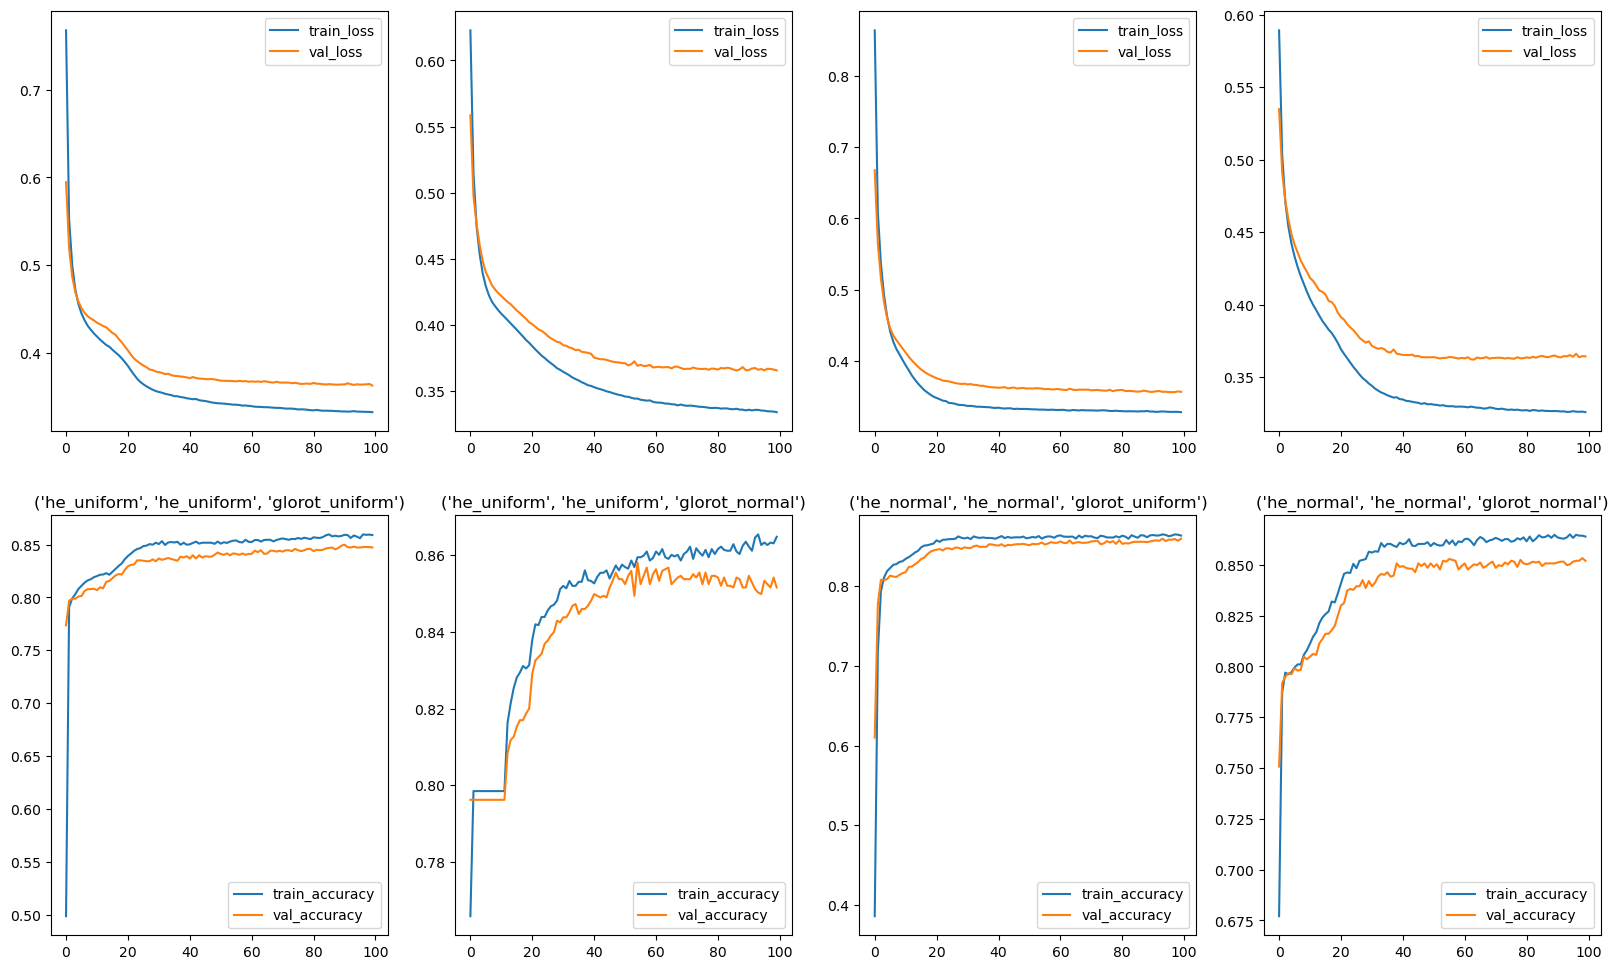

<Figure size 640x480 with 0 Axes>

In [12]:
figure , axes = plt.subplots(2,4,figsize=(20,12))

axes[0][0].plot(comparison_dict[('he_uniform', 'he_uniform', 'glorot_uniform')]['loss_train'])
axes[0][0].plot(comparison_dict[('he_uniform', 'he_uniform', 'glorot_uniform')]['loss_val'])
axes[0][0].legend(['train_loss','val_loss'])
axes[1][0].plot(comparison_dict[('he_uniform', 'he_uniform', 'glorot_uniform')]['acc_train'])
axes[1][0].plot(comparison_dict[('he_uniform', 'he_uniform', 'glorot_uniform')]['acc_val'])
axes[1][0].legend(['train_accuracy','val_accuracy'],loc='lower right')
axes[1][0].set_title(('he_uniform', 'he_uniform', 'glorot_uniform'))

axes[0][1].plot(comparison_dict[('he_uniform', 'he_uniform', 'glorot_normal')]['loss_train'])
axes[0][1].plot(comparison_dict[('he_uniform', 'he_uniform', 'glorot_normal')]['loss_val'])
axes[0][1].legend(['train_loss','val_loss'])
axes[1][1].plot(comparison_dict[('he_uniform', 'he_uniform', 'glorot_normal')]['acc_train'])
axes[1][1].plot(comparison_dict[('he_uniform', 'he_uniform', 'glorot_normal')]['acc_val'])
axes[1][1].legend(['train_accuracy','val_accuracy'],loc='lower right')
axes[1][1].set_title(('he_uniform', 'he_uniform', 'glorot_normal'))

axes[0][2].plot(comparison_dict[('he_normal', 'he_normal', 'glorot_uniform')]['loss_train'])
axes[0][2].plot(comparison_dict[('he_normal', 'he_normal', 'glorot_uniform')]['loss_val'])
axes[0][2].legend(['train_loss','val_loss'])
axes[1][2].plot(comparison_dict[('he_normal', 'he_normal', 'glorot_uniform')]['acc_train'])
axes[1][2].plot(comparison_dict[('he_normal', 'he_normal', 'glorot_uniform')]['acc_val'])
axes[1][2].legend(['train_accuracy','val_accuracy'],loc='lower right')
axes[1][2].set_title(('he_normal', 'he_normal', 'glorot_uniform'))

axes[0][3].plot(comparison_dict[('he_normal', 'he_normal', 'glorot_normal')]['loss_train'])
axes[0][3].plot(comparison_dict[('he_normal', 'he_normal', 'glorot_normal')]['loss_val'])
axes[0][3].legend(['train_loss','val_loss'])
axes[1][3].plot(comparison_dict[('he_normal', 'he_normal', 'glorot_normal')]['acc_train'])
axes[1][3].plot(comparison_dict[('he_normal', 'he_normal', 'glorot_normal')]['acc_val'])
axes[1][3].legend(['train_accuracy','val_accuracy'],loc='lower right')
axes[1][3].set_title(('he_normal', 'he_normal', 'glorot_normal'))


plt.show()
plt.tight_layout()



In [13]:
accuracies

{('he_uniform', 'he_uniform', 'glorot_uniform'): 85.6,
 ('he_uniform', 'he_uniform', 'glorot_normal'): 85.3,
 ('he_normal', 'he_normal', 'glorot_uniform'): 85.5,
 ('he_normal', 'he_normal', 'glorot_normal'): 85.47}